<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_4X/blob/main/GQtest_cluster_data_multi_delta_(2_4)_n120_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_4X/multiplication_delta_2.4'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_2.4_n120.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,73.207077,71.855551,20.794816,66.496911,-78.775804,163.578551,272.068948,-108.490397
1,0.0,1.0,94.187838,80.161390,69.823675,69.287755,498.916789,822.377448,338.522059,483.855389
2,0.0,2.0,52.682595,98.175342,50.211410,56.117238,93.452461,360.639046,299.099168,61.539878
3,0.0,3.0,64.415429,78.518140,44.146348,74.341180,245.288699,516.709796,290.494134,226.215662
4,0.0,4.0,57.150418,56.326597,99.031088,72.560127,19.300475,314.368704,296.156069,18.212635
...,...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,34.772512,87.423396,52.113294,76.515320,-108.566175,152.258348,267.755029,-115.496681
119996,999.0,116.0,97.084875,70.631873,99.970225,82.223942,-187.838008,172.072906,357.601390,-185.528484
119997,999.0,117.0,22.180738,22.771172,48.294630,55.440255,-6.302521,152.384274,134.068859,18.315415
119998,999.0,118.0,40.798788,28.249416,51.839247,21.773691,43.710265,196.371408,126.126602,70.244806


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4           e  \
rep   index                                                           
0.0   0.0    73.207077  71.855551  20.794816  66.496911  -78.775804   
      1.0    94.187838  80.161390  69.823675  69.287755  498.916789   
      2.0    52.682595  98.175342  50.211410  56.117238   93.452461   
      3.0    64.415429  78.518140  44.146348  74.341180  245.288699   
      4.0    57.150418  56.326597  99.031088  72.560127   19.300475   
...                ...        ...        ...        ...         ...   
999.0 115.0  34.772512  87.423396  52.113294  76.515320 -108.566175   
      116.0  97.084875  70.631873  99.970225  82.223942 -187.838008   
      117.0  22.180738  22.771172  48.294630  55.440255   -6.302521   
      118.0  40.798788  28.249416  51.839247  21.773691   43.710265   
      119.0  91.245870  36.978713  46.835381  40.078311  -69.177941   

                      Y       y_hat       e_hat  
rep   index                                      
0.0   0.0    163.578551  272.068948 -108.490397  
      1.0    822.377448  338.522059  483.855389  
      2.0    360.639046  299.099168   61.539878  
      3.0    516.709796  290.494134  226.215662  
      4.0    314.368704  296.156069   18.212635  
...                 ...         ...         ...  
999.0 115.0  152.258348  267.755029 -115.496681  
      116.0  172.072906  357.601390 -185.528484  
      117.0  152.384274  134.068859   18.315415  
      118.0  196.371408  126.126602   70.244806  
      119.0  155.960334  257.072951 -101.112617  

[120000 rows x 8 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4           e  \
rep   index                                                           
0.0   0.0    73.207077  71.855551  20.794816  66.496911  -78.775804   
      1.0    94.187838  80.161390  69.823675  69.287755  498.916789   
      2.0    52.682595  98.175342  50.211410  56.117238   93.452461   
      3.0    64.415429  78.518140  44.146348  74.341180  245.288699   
      4.0    57.150418  56.326597  99.031088  72.560127   19.300475   
...                ...        ...        ...        ...         ...   
999.0 115.0  34.772512  87.423396  52.113294  76.515320 -108.566175   
      116.0  97.084875  70.631873  99.970225  82.223942 -187.838008   
      117.0  22.180738  22.771172  48.294630  55.440255   -6.302521   
      118.0  40.798788  28.249416  51.839247  21.773691   43.710265   
      119.0  91.245870  36.978713  46.835381  40.078311  -69.177941   

                      Y       y_hat       e_hat  
rep   index                                      
0.0   0.0    163.578551  272.068948 -108.490397  
      1.0    822.377448  338.522059  483.855389  
      2.0    360.639046  299.099168   61.539878  
      3.0    516.709796  290.494134  226.215662  
      4.0    314.368704  296.156069   18.212635  
...                 ...         ...         ...  
999.0 115.0  152.258348  267.755029 -115.496681  
      116.0  172.072906  357.601390 -185.528484  
      117.0  152.384274  134.068859   18.315415  
      118.0  196.371408  126.126602   70.244806  
      119.0  155.960334  257.072951 -101.112617  

[120000 rows x 8 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,73.207077,71.855551,20.794816,66.496911,-78.775804,163.578551,272.068948,-108.490397
1,0.0,1.0,94.187838,80.161390,69.823675,69.287755,498.916789,822.377448,338.522059,483.855389
2,0.0,2.0,52.682595,98.175342,50.211410,56.117238,93.452461,360.639046,299.099168,61.539878
3,0.0,3.0,64.415429,78.518140,44.146348,74.341180,245.288699,516.709796,290.494134,226.215662
4,0.0,4.0,57.150418,56.326597,99.031088,72.560127,19.300475,314.368704,296.156069,18.212635
...,...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,34.772512,87.423396,52.113294,76.515320,-108.566175,152.258348,267.755029,-115.496681
119996,999.0,116.0,97.084875,70.631873,99.970225,82.223942,-187.838008,172.072906,357.601390,-185.528484
119997,999.0,117.0,22.180738,22.771172,48.294630,55.440255,-6.302521,152.384274,134.068859,18.315415
119998,999.0,118.0,40.798788,28.249416,51.839247,21.773691,43.710265,196.371408,126.126602,70.244806


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         x4           e  \
rep   index                                                           
0.0   0.0    73.207077  71.855551  20.794816  66.496911  -78.775804   
      1.0    94.187838  80.161390  69.823675  69.287755  498.916789   
      2.0    52.682595  98.175342  50.211410  56.117238   93.452461   
      3.0    64.415429  78.518140  44.146348  74.341180  245.288699   
      4.0    57.150418  56.326597  99.031088  72.560127   19.300475   
...                ...        ...        ...        ...         ...   
999.0 115.0  34.772512  87.423396  52.113294  76.515320 -108.566175   
      116.0  97.084875  70.631873  99.970225  82.223942 -187.838008   
      117.0  22.180738  22.771172  48.294630  55.440255   -6.302521   
      118.0  40.798788  28.249416  51.839247  21.773691   43.710265   
      119.0  91.245870  36.978713  46.835381  40.078311  -69.177941   

                      Y       y_hat       e_hat  
rep   index                                      
0.0   0.0    163.578551  272.068948 -108.490397  
      1.0    822.377448  338.522059  483.855389  
      2.0    360.639046  299.099168   61.539878  
      3.0    516.709796  290.494134  226.215662  
      4.0    314.368704  296.156069   18.212635  
...                 ...         ...         ...  
999.0 115.0  152.258348  267.755029 -115.496681  
      116.0  172.072906  357.601390 -185.528484  
      117.0  152.384274  134.068859   18.315415  
      118.0  196.371408  126.126602   70.244806  
      119.0  155.960334  257.072951 -101.112617  

[120000 rows x 8 columns]

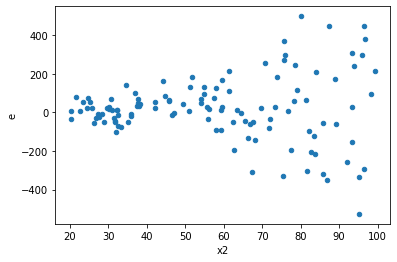

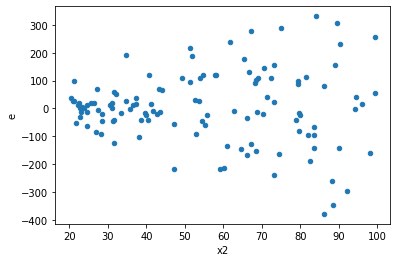

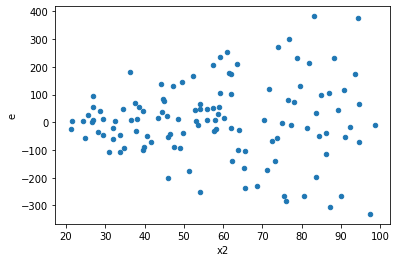

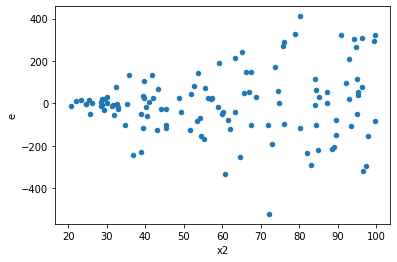

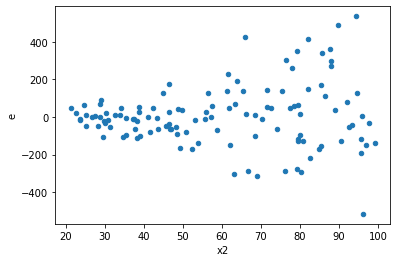

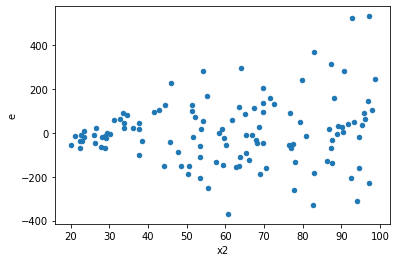

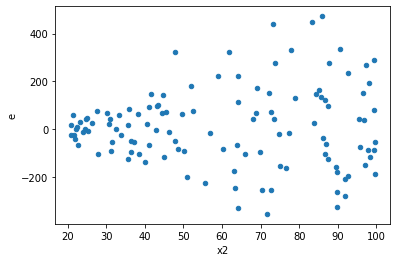

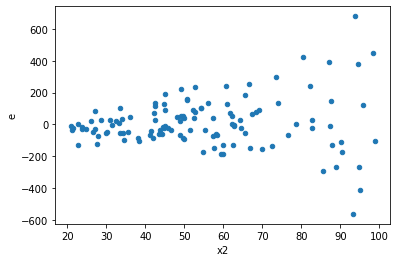

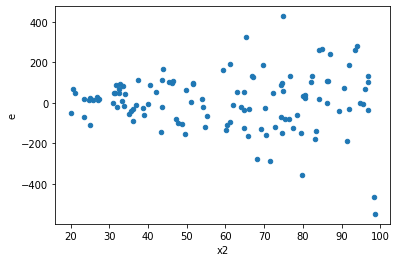

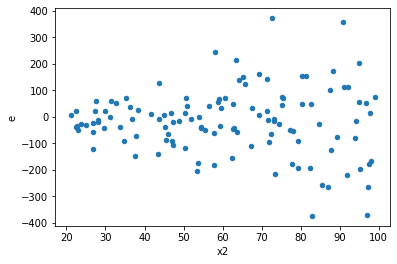

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[['x1', 'x2', 'x3', 'x4']]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,56.0,56.0,1060330.8187949944,2161120.0256547374,18934.47890705347,38591.42902954888,2.0381563822795674,0.008658729771294338,0.9956706351143528,0.004329364885647169,Reject005=0 : Heteroscedasticity
1.0,58.0,54.0,513249.84598430694,1281300.605309367,8849.1352755915,23727.7889872105,2.6813680939716984,0.00034567055819501036,0.9998271647209025,0.00017283527909750518,Reject005=0 : Heteroscedasticity
7.0,56.0,56.0,1199599.9555156603,1608275.8720785019,21421.427777065364,28719.21200140182,1.34067683537648,0.27565344645858914,0.8621732767707054,0.13782672322929457,Reject005=1 : Homoscedasticity
9.0,53.0,59.0,667579.0445222633,1021059.0617686134,12595.83102872195,17306.085792688362,1.373953473433054,0.23508432449840333,0.8824578377507983,0.11754216224920166,Reject005=1 : Homoscedasticity
10.0,42.0,70.0,353849.07585716207,1999675.3330583677,8424.977996599097,28566.790472262397,3.390725825491049,6.211883541329399e-06,0.9999968940582293,3.1059417706646997e-06,Reject005=0 : Heteroscedasticity
14.0,56.0,56.0,520391.8416778849,1229291.2050080984,9292.711458533659,21951.6286608589,2.3622415006440707,0.0016054645343530627,0.9991972677328235,0.0008027322671765313,Reject005=0 : Heteroscedasticity
16.0,46.0,66.0,550524.4225595988,1665448.552768709,11967.922229556496,25234.068981344073,2.108475347460475,0.005439072718075089,0.9972804636409625,0.0027195363590375443,Reject005=0 : Heteroscedasticity
17.0,51.0,61.0,910974.7367362758,1799626.9639574725,17862.249739926978,29502.08137635201,1.6516442108860927,0.06095752769315155,0.9695212361534242,0.030478763846575774,Reject005=1 : Homoscedasticity
22.0,60.0,52.0,1560281.0860845307,2123203.4500575634,26004.684768075513,40830.83557803006,1.5701338409668315,0.09810622720784035,0.9509468863960798,0.04905311360392017,Reject005=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,56.0,56.0,1060330.8187949944,2161120.0256547374,18934.47890705347,38591.42902954888,2.0381563822795674,0.008658729771294338,Reject005=0 : Heteroscedasticity
1.0,58.0,54.0,513249.84598430694,1281300.605309367,8849.1352755915,23727.7889872105,2.6813680939716984,0.00034567055819501036,Reject005=0 : Heteroscedasticity
2.0,47.0,65.0,948093.1356558925,1150178.7974683754,20172.194375657287,17695.05842259039,0.8772004717515428,0.6417256623400777,Reject005=1 : Homoscedasticity
3.0,56.0,56.0,1923164.8323125062,739477.9780899029,34342.22914843761,13204.963894462551,0.3845109715326475,0.00047212900631570415,Reject005=0 : Heteroscedasticity
4.0,48.0,64.0,1540306.787555378,1510394.495657331,32089.72474073704,23599.913994645798,0.7354352268620847,0.26714225157162774,Reject005=1 : Homoscedasticity
5.0,50.0,62.0,1729238.8362845157,652112.3760378583,34584.77672569032,10517.941548997715,0.3041205566374168,2.7036970049072207e-05,Reject005=0 : Heteroscedasticity
6.0,57.0,55.0,2288570.3773083678,715501.285877304,40150.35749663803,13009.114288678255,0.32400992418978003,3.98275762566469e-05,Reject005=0 : Heteroscedasticity
7.0,56.0,56.0,1199599.9555156603,1608275.8720785019,21421.427777065364,28719.21200140182,1.34067683537648,0.27565344645858914,Reject005=1 : Homoscedasticity
8.0,63.0,49.0,1837925.331838083,342782.26148268394,29173.417965683857,6995.556356789468,0.23979214108604652,1.6962909786246424e-07,Reject005=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      518
Reject005=0 : Heteroscedasticity    482
Name: Result_test, dtype: int64